In [1]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Embarked','Cabin'],axis='columns',inplace=True)

In [6]:
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
survived=data['Survived']
data.drop('Survived',inplace=True,axis='columns')

In [7]:
survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
data.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [9]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [10]:
data.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_x,test_x,train_y,test_y=train_test_split(data,survived,test_size=0.2,random_state=42)

In [13]:
train_x

,Pclass,Sex,Age,Fare
331,1,male,45.500000,28.5000
733,2,male,23.000000,13.0000
382,3,male,32.000000,7.9250
704,3,male,26.000000,7.8542
813,3,female,6.000000,31.2750
...,...,...,...,...
106,3,female,21.000000,7.6500
270,1,male,29.699118,31.0000
860,3,male,41.000000,14.1083
435,1,female,14.000000,120.0000


In [14]:
data

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


In [15]:
model=DecisionTreeClassifier()

In [16]:
train_y

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder=LabelEncoder()

In [19]:
train_x['sexx']=label_encoder.fit_transform(train_x['Sex'])

In [20]:
train_x

,Pclass,Sex,Age,Fare,sexx
331,1,male,45.500000,28.5000,1
733,2,male,23.000000,13.0000,1
382,3,male,32.000000,7.9250,1
704,3,male,26.000000,7.8542,1
813,3,female,6.000000,31.2750,0
...,...,...,...,...,...
106,3,female,21.000000,7.6500,0
270,1,male,29.699118,31.0000,1
860,3,male,41.000000,14.1083,1
435,1,female,14.000000,120.0000,0


In [21]:
train_x.drop('Sex',axis='columns',inplace=True)

In [22]:
train_x

,Pclass,Age,Fare,sexx
331,1,45.500000,28.5000,1
733,2,23.000000,13.0000,1
382,3,32.000000,7.9250,1
704,3,26.000000,7.8542,1
813,3,6.000000,31.2750,0
...,...,...,...,...
106,3,21.000000,7.6500,0
270,1,29.699118,31.0000,1
860,3,41.000000,14.1083,1
435,1,14.000000,120.0000,0


In [23]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [24]:
model.score(train_x,train_y)

0.9789325842696629

In [25]:
test_x['sexx']=label_encoder.fit_transform(test_x['Sex'])

In [26]:
test_x

,Pclass,Sex,Age,Fare,sexx
709,3,male,29.699118,15.2458,1
439,2,male,31.000000,10.5000,1
840,3,male,20.000000,7.9250,1
720,2,female,6.000000,33.0000,0
39,3,female,14.000000,11.2417,0
...,...,...,...,...,...
433,3,male,17.000000,7.1250,1
773,3,male,29.699118,7.2250,1
25,3,female,38.000000,31.3875,0
84,2,female,17.000000,10.5000,0


In [27]:
test_x.drop('Sex',axis='columns',inplace=True)

In [28]:
res=model.predict(test_x)

In [29]:
res

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [30]:
from sklearn.metrics import r2_score,f1_score

In [31]:
f1_score(res,test_y)

0.7027027027027027

In [32]:
import matplotlib.pyplot as plt

In [33]:
from sklearn.tree import plot_tree

In [34]:
train_y.unique()

array([0, 1], dtype=int64)

In [35]:
train_x.columns

Index(['Pclass', 'Age', 'Fare', 'sexx'], dtype='object')

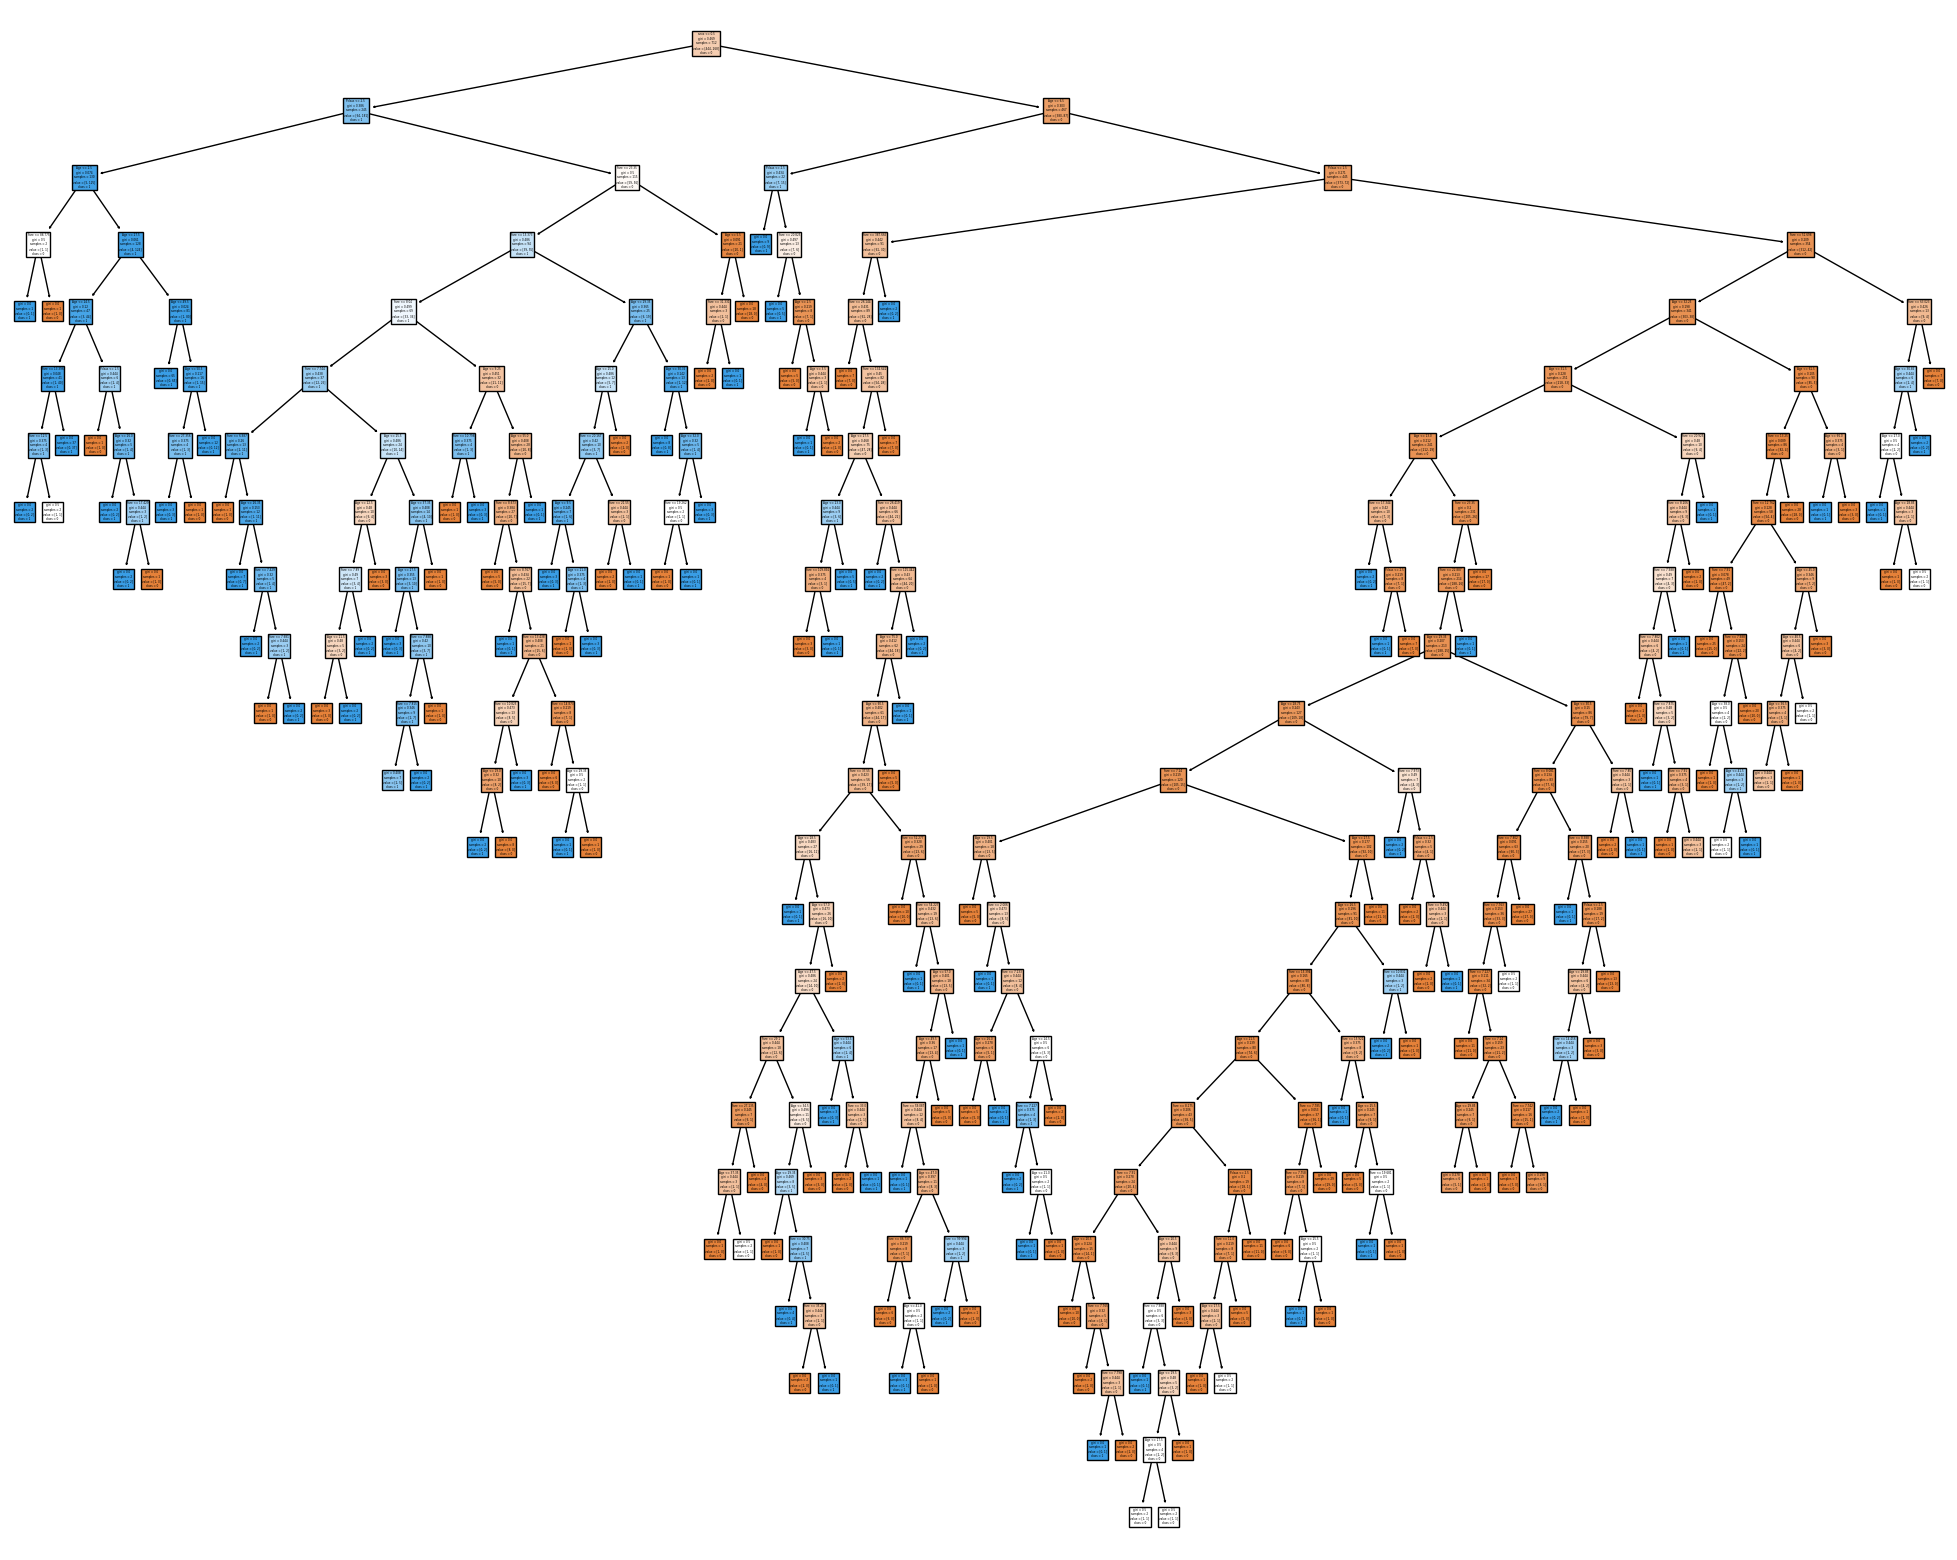

In [36]:
fig=plt.figure(figsize=(25,20))
_=plot_tree(model,filled=True,feature_names=train_x.columns.tolist(),class_names=train_y.unique().astype(str).tolist())
plt.show()

In [37]:
import joblib
joblib.dump(model,'DecisionTreeClassifier.pkl')

['DecisionTreeClassifier.pkl']

In [38]:
m=joblib.load('DecisionTreeClassifier.pkl')

In [39]:
m.predict(test_x)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)